# KernelKlassifier: Predicting Pumpkin Seed Types with KNN

#### Group 61 Project Report

Ramdhani, Boniarga, Rouf, Dai

## Introduction

Pumpkin seeds, derived from the Cucurbita pepo plant, have gained widespread popularity as a highly nutritious and beneficial food source. Their unique characteristics, including size, color, and flavor, not only contribute to their culinary appeal but also serve as potential indicators of different pumpkin seed varieties or cultivars. Understanding the genetic diversity among pumpkin seeds and optimizing cultivation practices specific to each seed class can significantly impact crop productivity and meet consumer preferences.

In recent years, the effectiveness of machine learning techniques in classifying agricultural products based on their unique physical attributes has been demonstrated. These techniques offer the potential to develop accurate and user-friendly classification systems for pumpkin seeds, which exhibit distinct characteristics such as eccentricity, roundness, aspect ratio, and compactness for each subspecies. Such classification systems provide valuable insights into the genetic diversity of pumpkin seeds and enable informed decision-making in cultivation practices. Among the various machine learning algorithms, the K-nearest neighbors (KNN) algorithm stands out as a simple and intuitive approach for classification, relying on the similarity of data points.

Therefore, the research question for this study is: Are the variables representing the unique physical shape such as eccentricity, roundness, aspect ratio, and compactness of the pumpkin seeds sufficient to provide high accuracy for predicting the type of pumpkin seeds (Çerçevelik and Ürgüp Sivrisi) by using the K-nearest neighbors algorithm?

This research project aims to explore the potential of using physical shape variables as predictors for accurately classifying pumpkin seed types, with a specific focus on the Çerçevelik and Ürgüp Sivrisi varieties. These two varieties exhibit distinct characteristics and are commonly cultivated in different regions. By applying the KNN algorithm, we seek to assess whether physical shape attributes alone are sufficient to achieve high accuracy in classifying pumpkin seeds into their respective types.

To achieve our objective, we will utilize a dataset obtained from Kaggle's website. The dataset comprises observational data in an Excel format, containing 13 columns and 2500 rows. These columns encompass a range of relevant attributes, including physical shape variables, color, size, and potentially additional characteristics such as flavor profiles.

Through a comprehensive analysis of this dataset, we aim to investigate the relationship between physical shape attributes and pumpkin seed types. Additionally, we will assess the suitability of the KNN algorithm in accurately predicting the seed type based on these physical characteristics. The findings of this research will contribute to a deeper understanding of the genetic diversity present in pumpkin seed varieties and provide valuable insights for optimizing cultivation practices specific to each seed class.

## Method & Results

### Data Wrangling and Exploration

#### Data loading and cleaning

In [1]:
# Import the necessary library

library(GGally)
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
library(readxl)
options(repr.matrix.max.rows = 6)

# Setting seed for the whole document for reproducibility
set.seed(2023)

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipe

In [2]:
# Loading dataset

url <- "https://raw.githubusercontent.com/FarrelRamdhani/DSCI-100-Team-Project/blasius/Pumpkin_Seeds_Dataset.csv"
pumpkin_data_raw <- read_csv(url)

pumpkin_data_raw

Rows: 2500 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Class
dbl (12): Area, Perimeter, Major_Axis_Length, Minor_Axis_Length, Convex_Area...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi
84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,Ürgüp Sivrisi


It can be seen above that the data is already tidy, therefore there isn't much for data wrangling.

In [3]:
# Initial data cleaning (removing NA) and factoring the class

pumpkin_data <- pumpkin_data_raw |>
    mutate(Class = as.factor(Class)) |>
    drop_na()
pumpkin_data

Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi
84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,Ürgüp Sivrisi


In [4]:
# Data checking and quantity analysis

count_pumpkin <- group_by(pumpkin_data, Class) |>
                    summarize(count = n())

count_pumpkin

Class,count
<fct>,<int>
Çerçevelik,1300
Ürgüp Sivrisi,1200


From the table above, it can be seen that the pumpkin data is adequately equal, hence we don't need to cut or balanced out the data.

#### Data splitting

In this project, we decided to split the data based on total parameter used. According to Joseph (2022), the ratio used for splitting the data for training and testing is $\sqrt p : 1$ where $p$ is the total parameter used. For our data exploration and visualization purposes, we assume that we will use all of the parameter thus our ratio is $\sqrt 12: 1$ or $3.464 : 1$ (78 percent goes to training and 22 percent goes to testing). Further splitting will be discussed after selecting the parameter used for this project.

In [5]:
pumpkin_split <- initial_split(pumpkin_data, prop = 0.78 , strata = Class)  
train_pumpkin <- training(pumpkin_split)   
test_pumpkin <- testing(pumpkin_split)
train_pumpkin
test_pumpkin

Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi
84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,Ürgüp Sivrisi


Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
80151,1088.349,420.8842,244.2649,80854,319.4549,0.8144,0.9913,0.7285,0.8503,1.7231,0.7590,Çerçevelik
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
60387,1016.508,433.2884,178.2834,60938,277.2853,0.9114,0.9910,0.6202,0.7344,2.4303,0.6400,Ürgüp Sivrisi
79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi


#### Pumpkin data visual analysis

Visual analysis was conducted for data visualization and selecting the parameter that will be used in this project. Our parameter selecting was conducted by visual analysis for clustering pattern that would be useful in K-NN classification and by analyzing the correlation of each variable

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



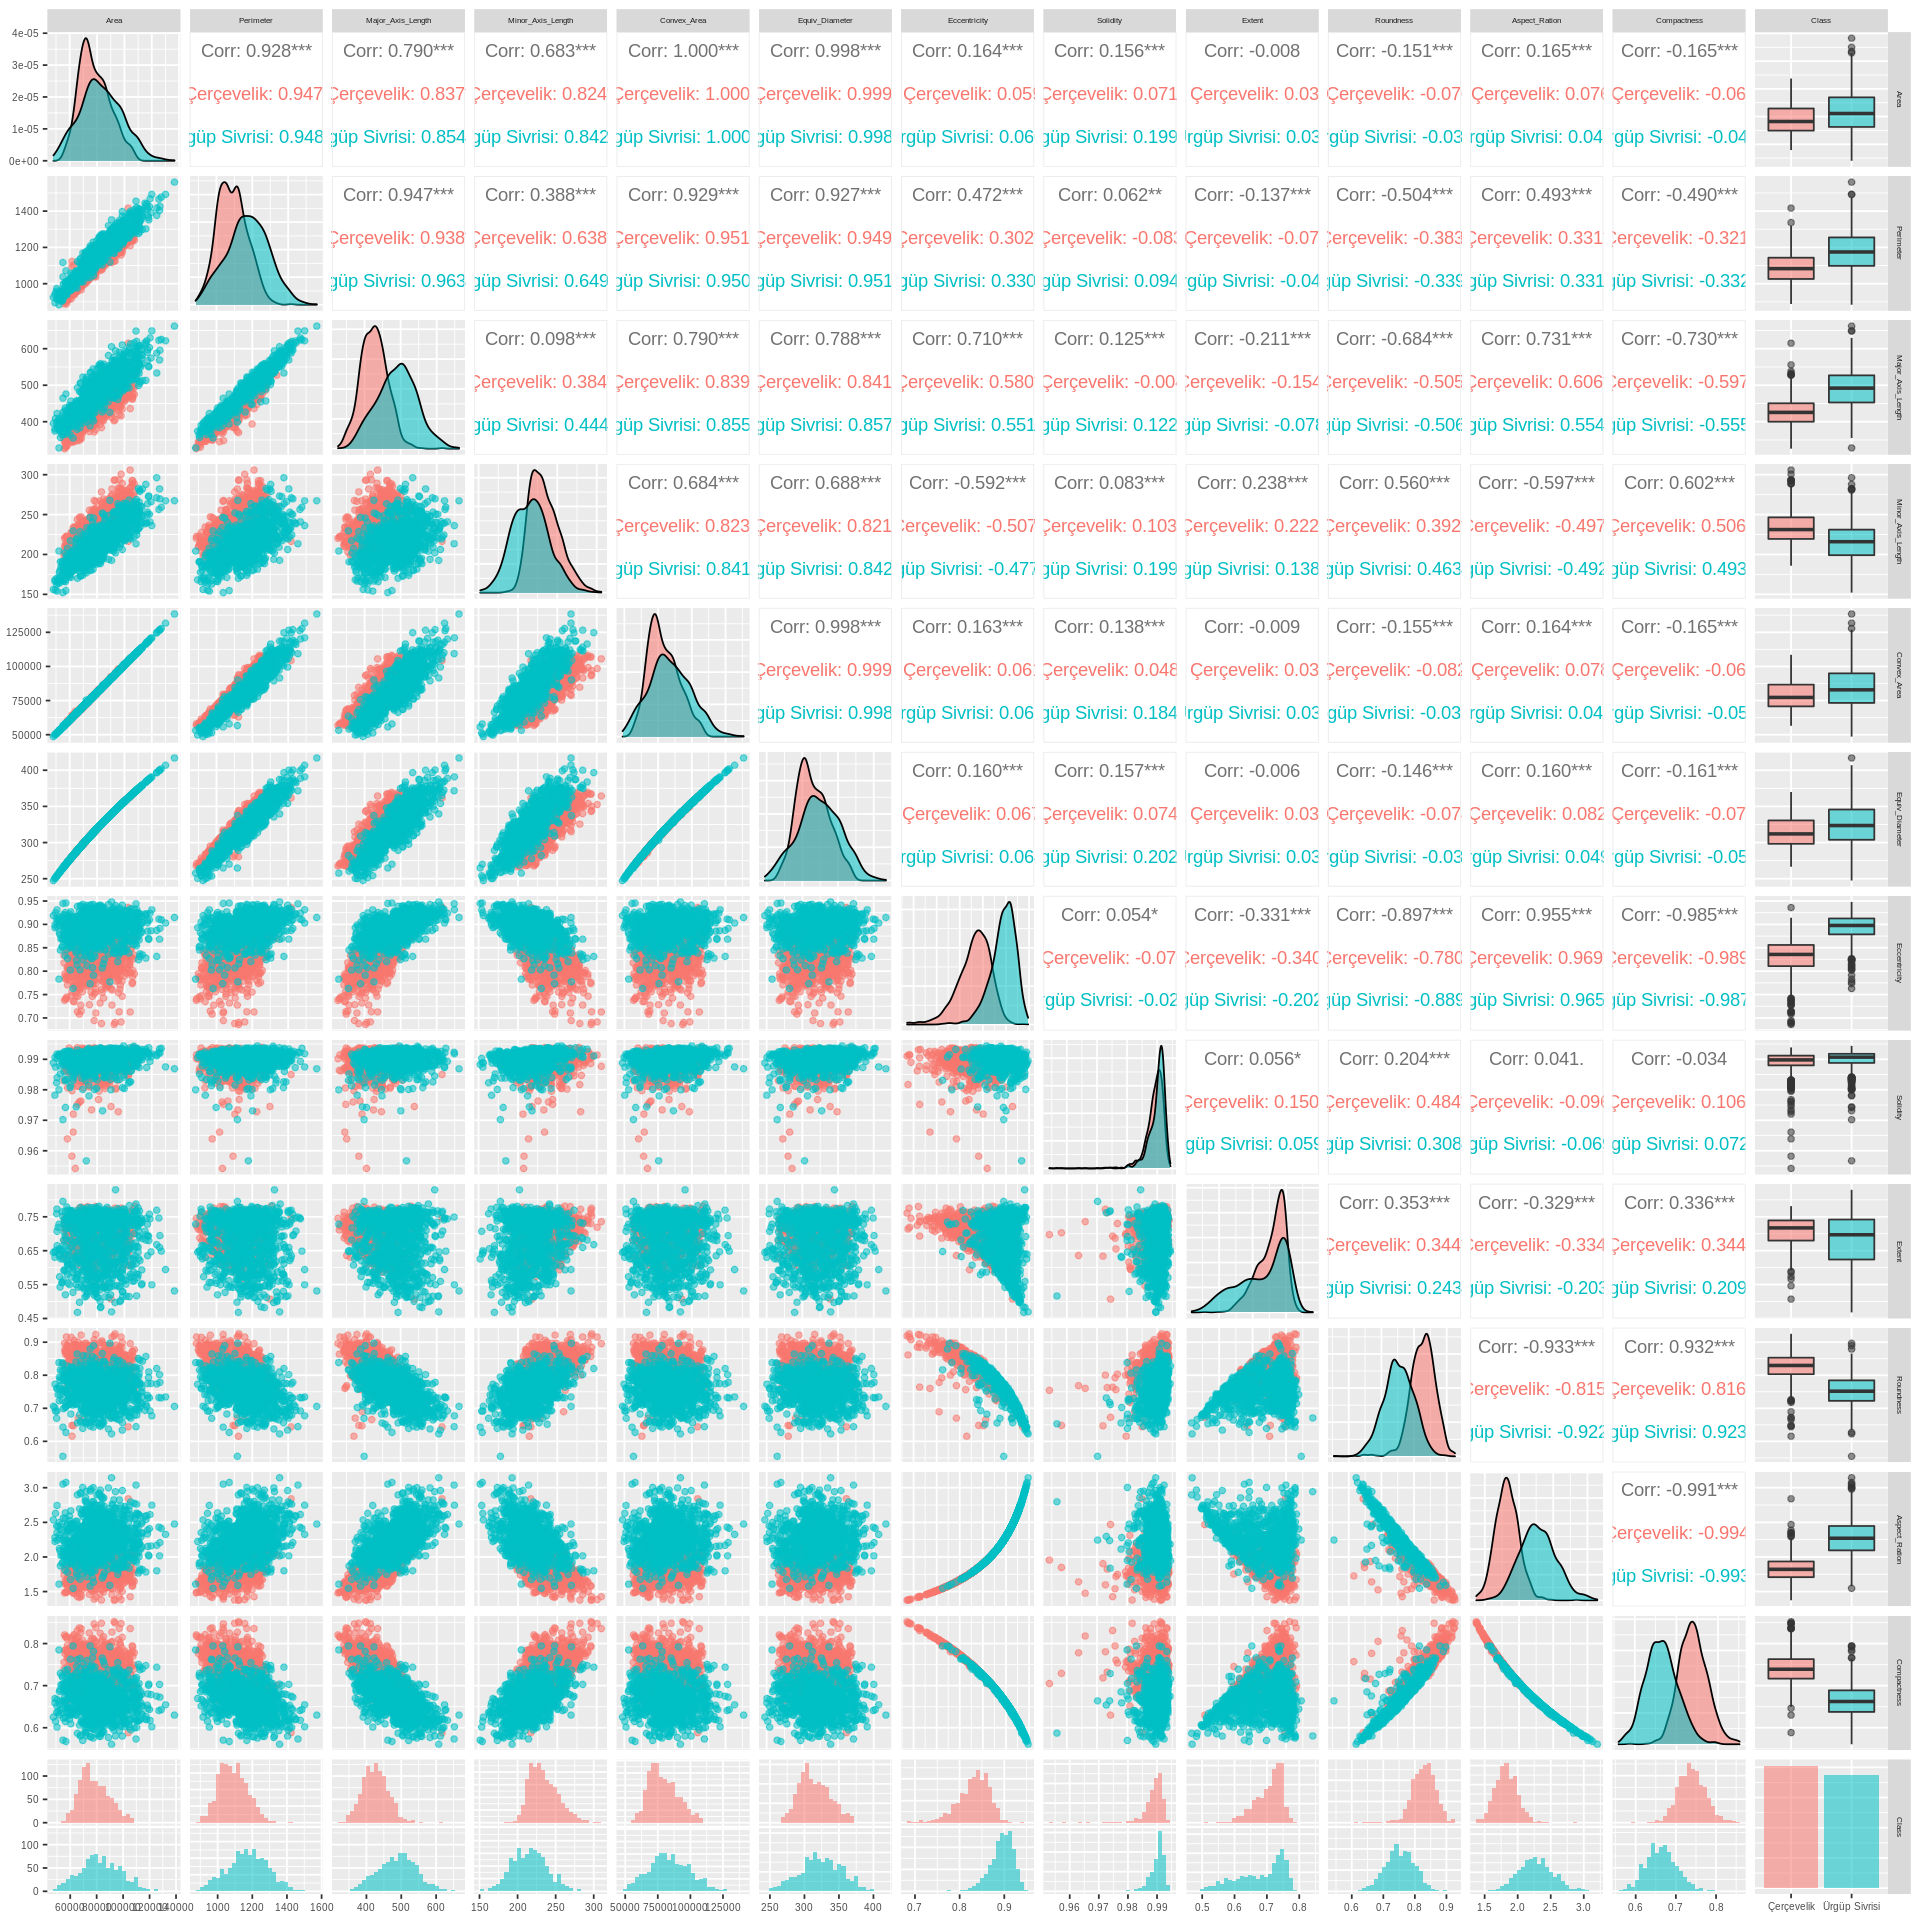

In [6]:
# Setting the plot width 
options(repr.plot.width=16, repr.plot.height=16)

# Pairwise comparison analysis of the multivariable data
train_pumpkin |>
    ggpairs(aes(color=Class, alpha=0.01)) +
        theme(axis.text = element_text(size = 6),
             text=element_text(size=6))

From the visualization above and observing the correlation matrix, we decided to choose eccentricity, roundness, aspect ratio, and compactness as our parameters. The rationale behind selecting these specific four variables was based on their ability to exhibit distinct values for each species of pumpkin seeds, in contrast to other variables that do not offer such differentiation. The accompanying plot strengthens this decision by visually depicting the distribution of data points in red and blue colors when these four parameters are plotted on the y-axis. Notably, the plot reveals a noticeable pattern where the red points tend to be concentrated at the top while the blue points predominantly occupy the bottom, or vice versa, indicating a clear distinction between the two species based on these variables. This distinctiveness in parameter values for each class has the potential to enhance the accuracy of the model, as emphasized by Batista & Silva (2009).

#### Selected data splliting

We further select the data from our main dataset and redo the splitting by using Joseph (2022) formula of $\sqrt p : 1$ in which we get $\sqrt 4 : 1$ or $2 : 1$

In [7]:
pumpkin_data_select <- select(pumpkin_data, Eccentricity, Roundness, Aspect_Ration, Compactness, Class)

pumpkin_data_select

Eccentricity,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.7376,0.8963,1.4809,0.8207,Çerçevelik
0.8275,0.8440,1.7811,0.7487,Çerçevelik
0.8749,0.7674,2.0651,0.6929,Çerçevelik
⋮,⋮,⋮,⋮,⋮
0.8990,0.7549,2.2828,0.6599,Ürgüp Sivrisi
0.9130,0.7185,2.4513,0.6359,Ürgüp Sivrisi
0.8621,0.7933,1.9735,0.7104,Ürgüp Sivrisi


In [8]:
pumpkin_split <- initial_split(pumpkin_data_select, prop = 2/3 , strata = Class)  
train_pumpkin <- training(pumpkin_split)   
test_pumpkin <- testing(pumpkin_split)
train_pumpkin
test_pumpkin

Eccentricity,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.7376,0.8963,1.4809,0.8207,Çerçevelik
0.8275,0.8440,1.7811,0.7487,Çerçevelik
0.8749,0.7674,2.0651,0.6929,Çerçevelik
⋮,⋮,⋮,⋮,⋮
0.9101,0.7444,2.4134,0.6433,Ürgüp Sivrisi
0.9130,0.7185,2.4513,0.6359,Ürgüp Sivrisi
0.8621,0.7933,1.9735,0.7104,Ürgüp Sivrisi


Eccentricity,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.8187,0.8338,1.7413,0.7557,Çerçevelik
0.8215,0.8480,1.7535,0.7522,Çerçevelik
0.8646,0.7957,1.9903,0.7067,Çerçevelik
⋮,⋮,⋮,⋮,⋮
0.8863,0.7626,2.1594,0.6774,Ürgüp Sivrisi
0.9340,0.6672,2.7996,0.5973,Ürgüp Sivrisi
0.8990,0.7549,2.2828,0.6599,Ürgüp Sivrisi


#### Further selected data visualization and analysis

We then further plots the selected parameters that show a really strong relationship among all chosen parameters for further visualization analysis and calculating the maximum, minimum, and average of the training dataset. 

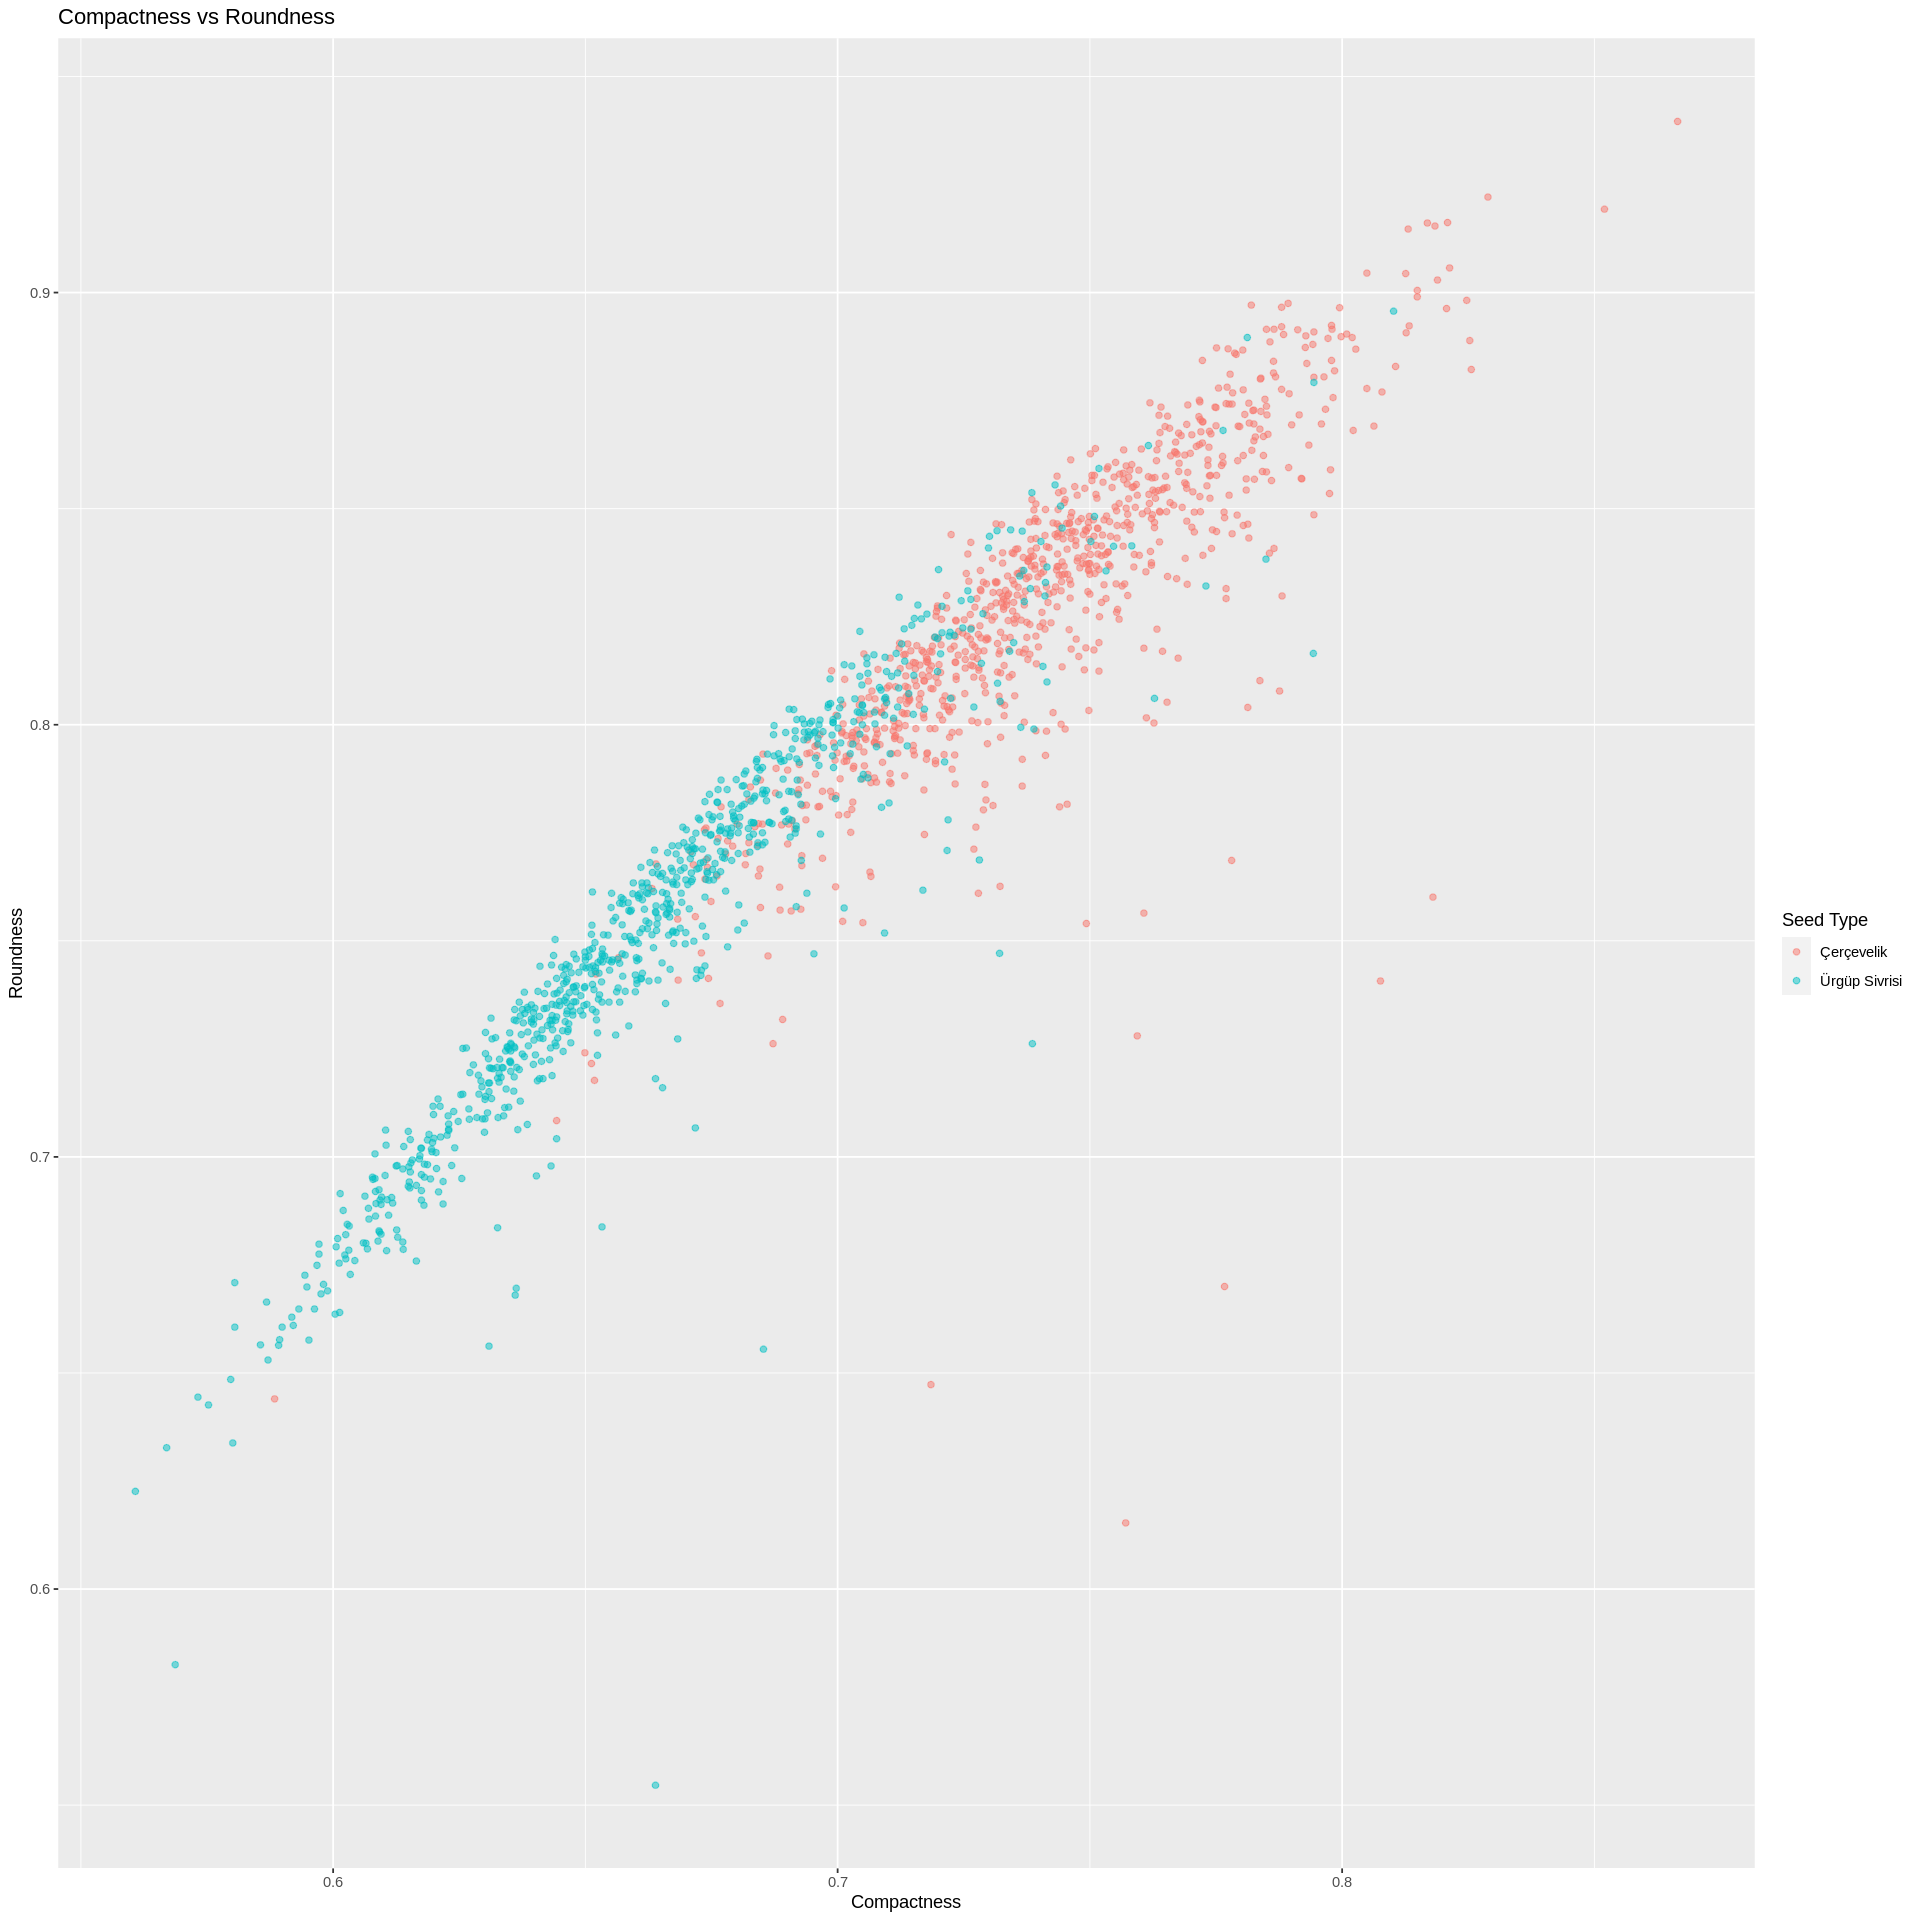

In [9]:
pumpkin_plot_1 <- ggplot(train_pumpkin, aes(x = Compactness, y = Roundness, color = Class)) +
                    geom_point(alpha = 0.5) +
                    labs(x = "Compactness", y = "Roundness", color = "Seed Type", title="Compactness vs Roundness")

pumpkin_plot_1

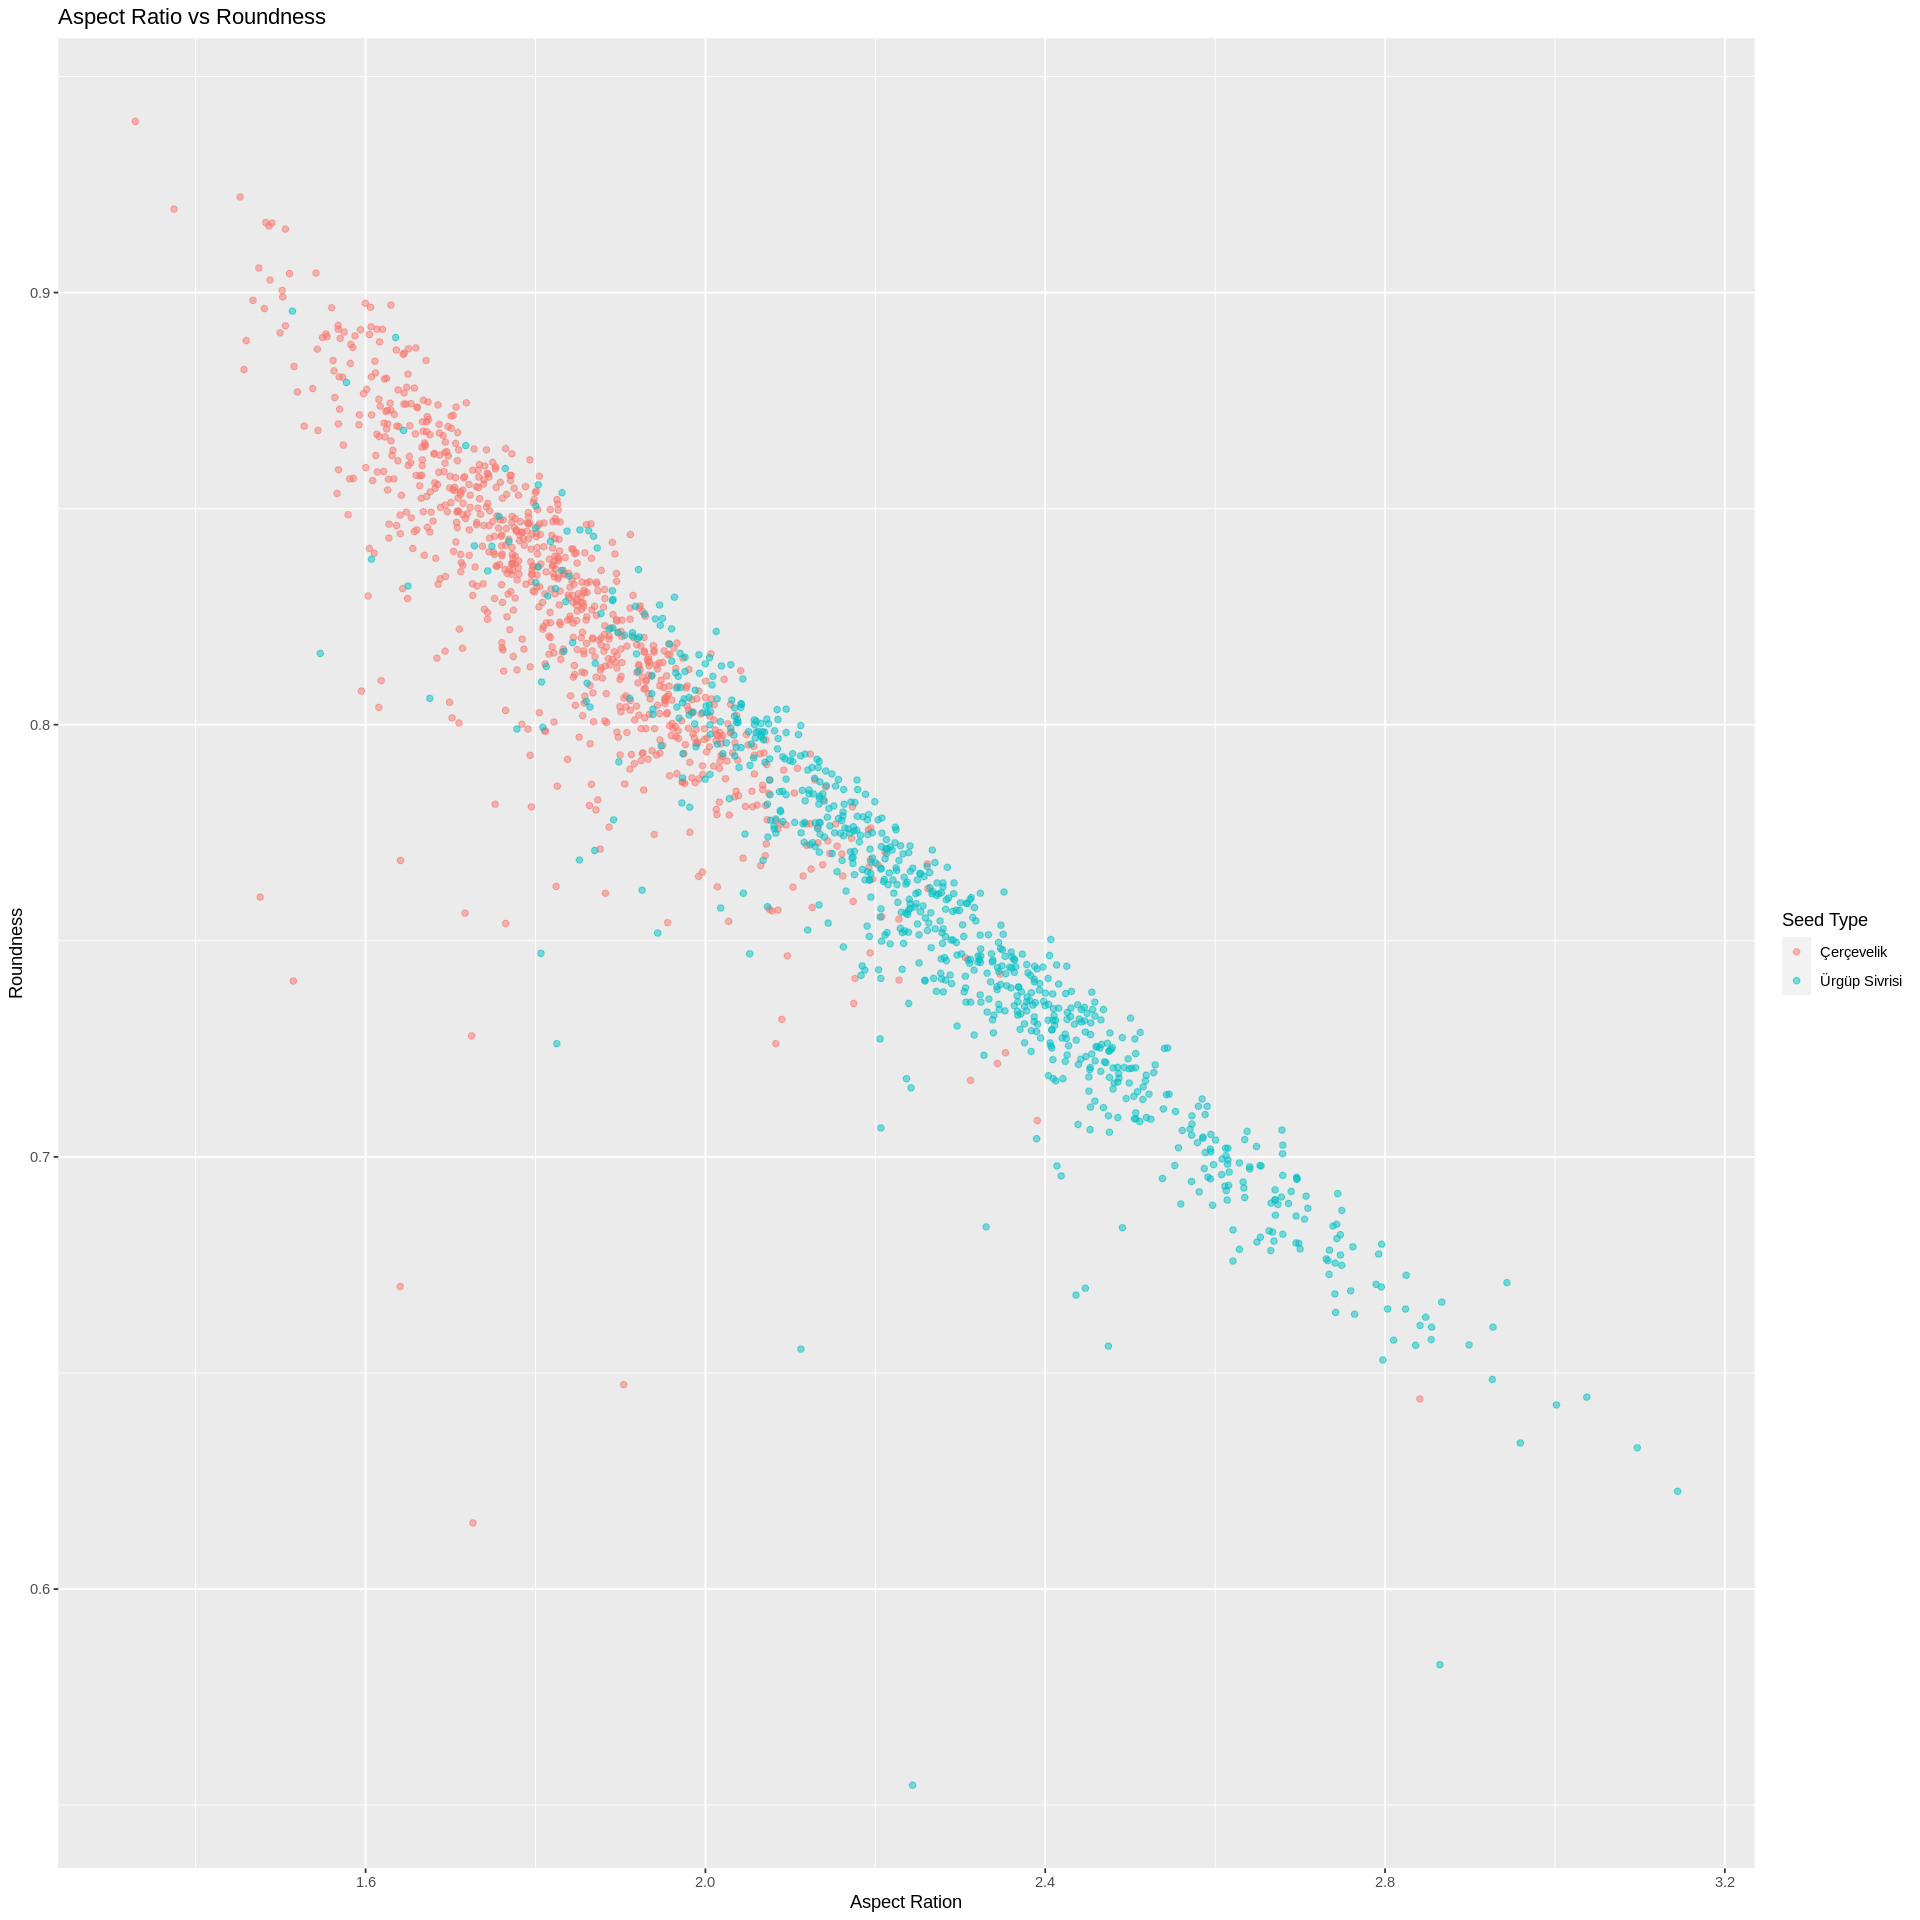

In [10]:
pumpkin_plot_2 <- ggplot(train_pumpkin, aes(x = Aspect_Ration, y = Roundness, color = Class)) +
                    geom_point(alpha = 0.5) +
                    labs(x = "Aspect Ration", y = "Roundness", color = "Seed Type", title="Aspect Ratio vs Roundness")

pumpkin_plot_2

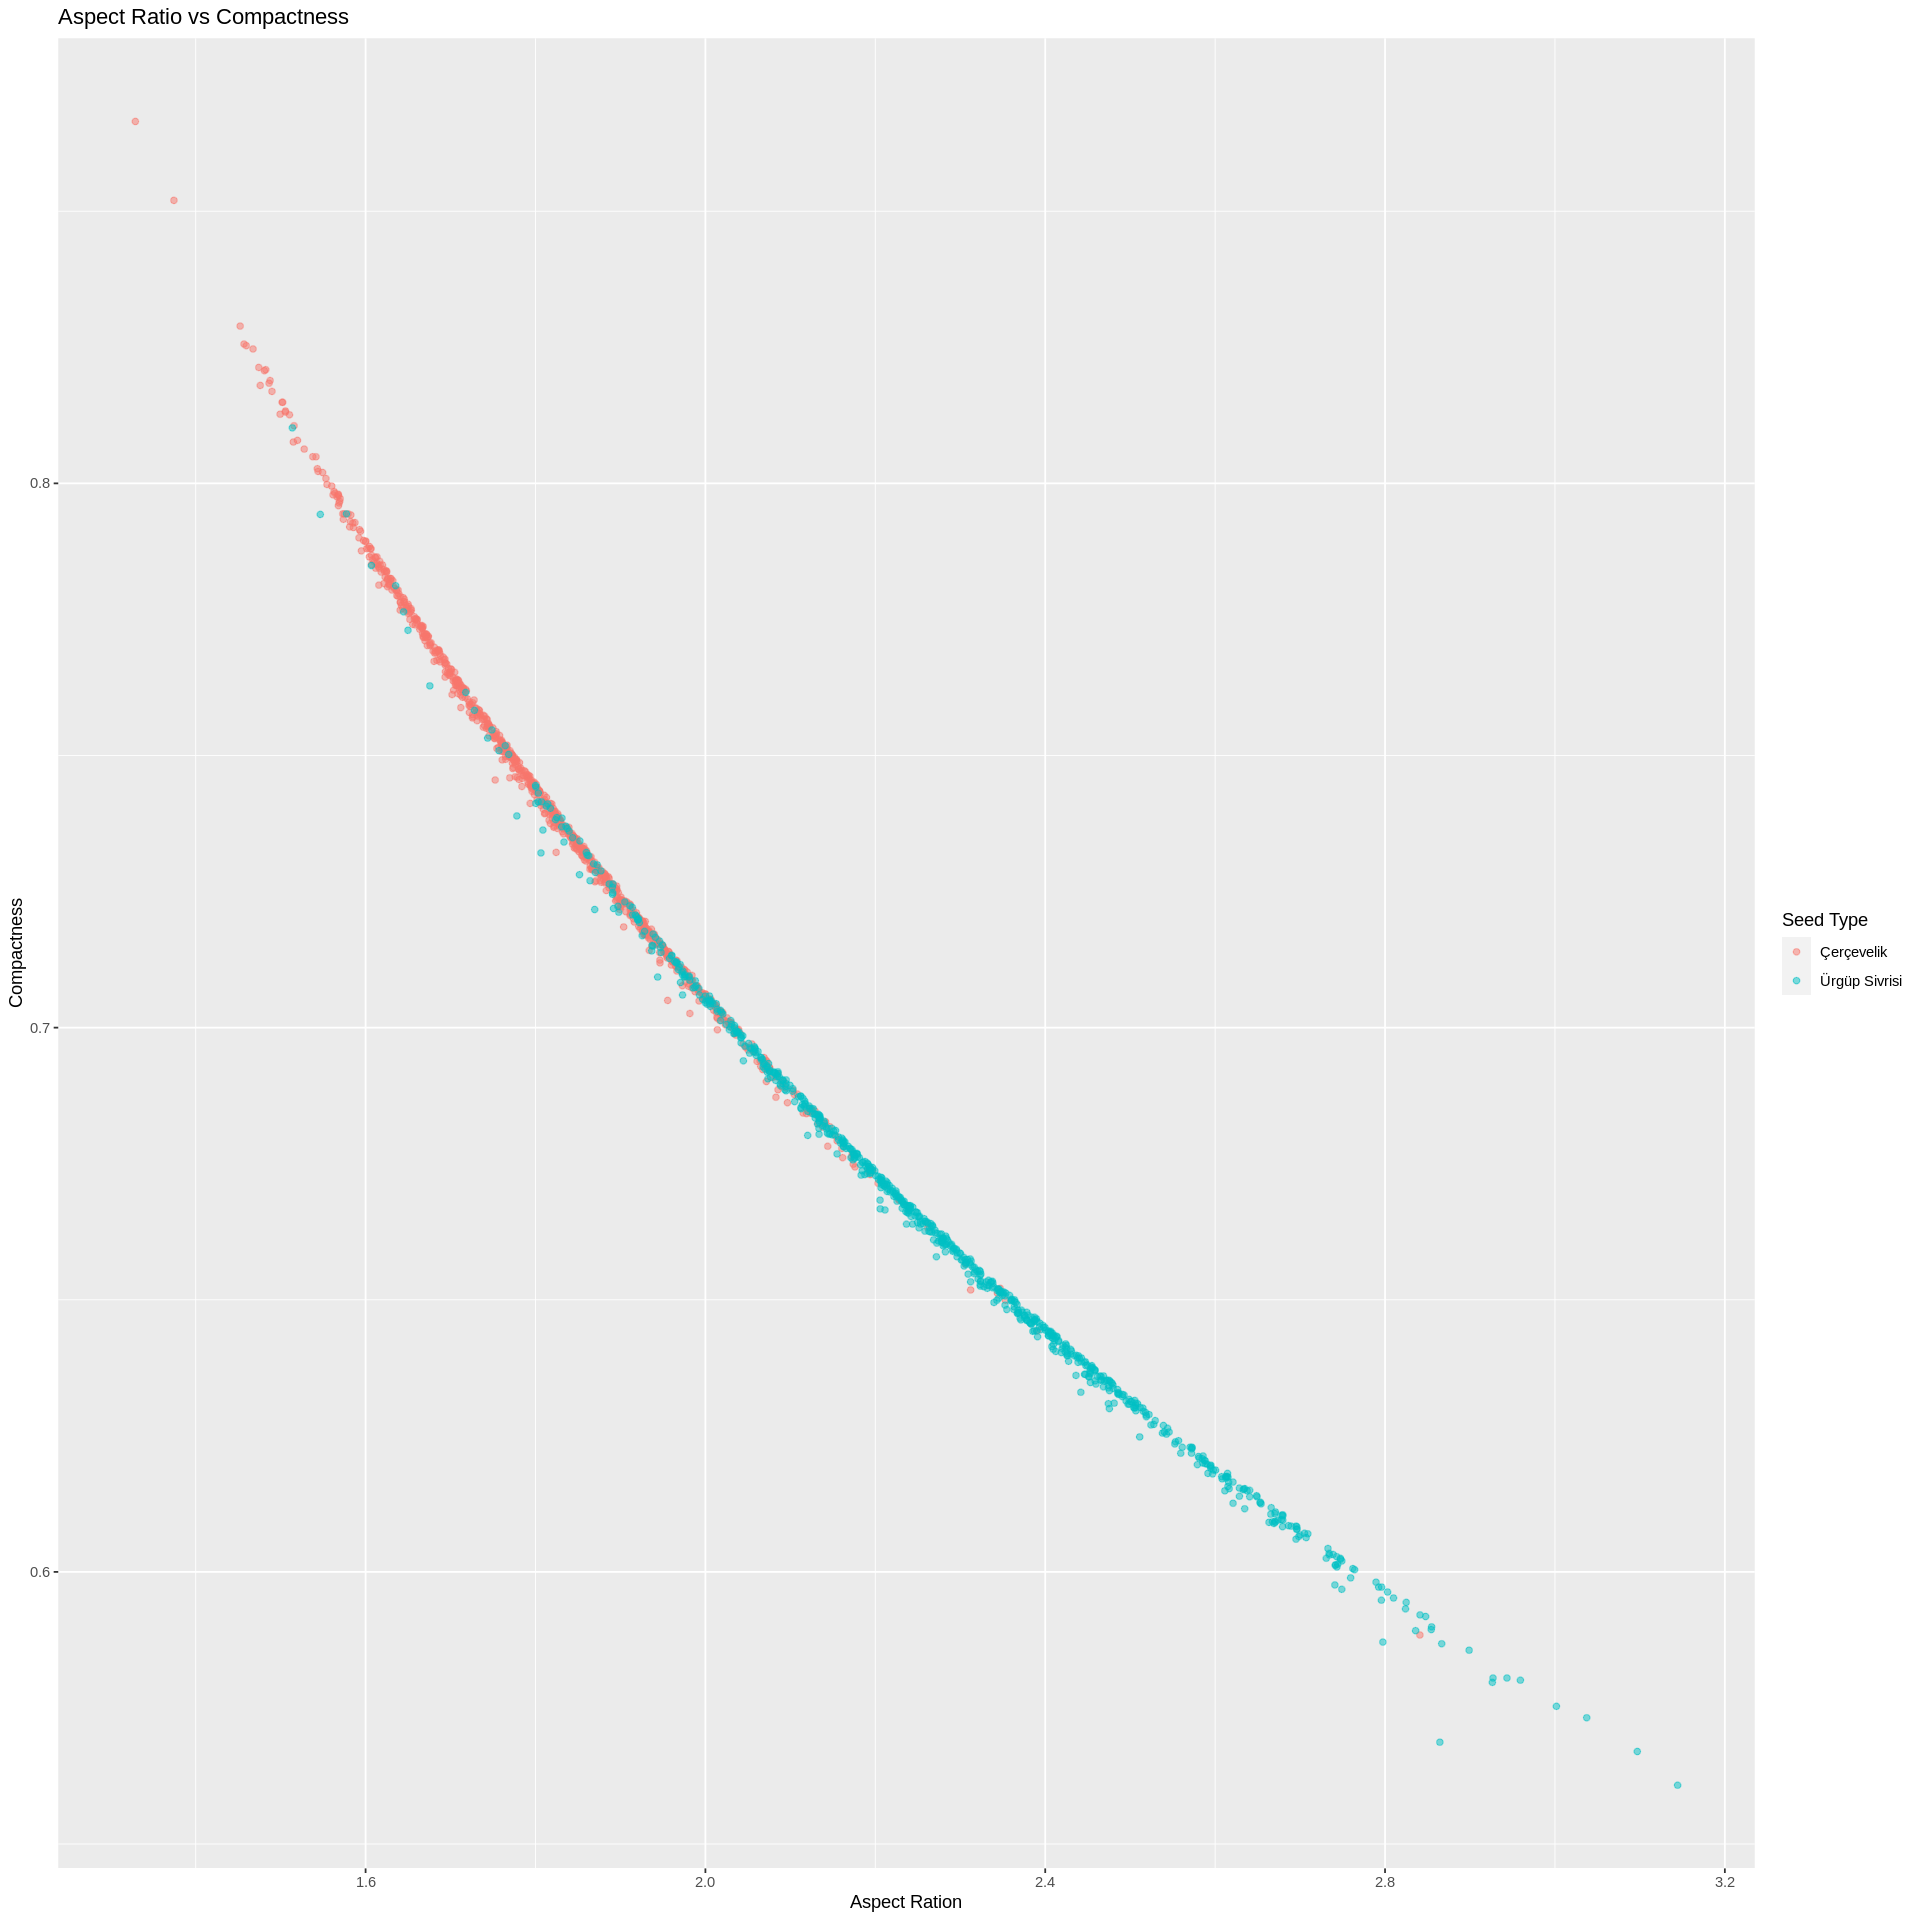

In [11]:
pumpkin_plot_2 <- ggplot(train_pumpkin, aes(x = Aspect_Ration, y = Compactness, color = Class)) +
                    geom_point(alpha = 0.5) +
                    labs(x = "Aspect Ration", y = "Compactness", color = "Seed Type", title="Aspect Ratio vs Compactness")

pumpkin_plot_2

In [12]:
# 1 is Çerçevelik
# 2 is Ürgüp Sivrisi

#AVERAGE
Just_Çerçevelik_avg <- train_pumpkin |>
                        filter(Class == "Çerçevelik") |>
                        select(- Class) |>
                        map_df(mean)


Just_ÇÜrgüp_Sivrisi_avg <- train_pumpkin |>
                        filter(Class == "Ürgüp Sivrisi") |>
                        select(- Class) |>
                        map_df(mean)


average_pumpkin <- bind_rows(Just_Çerçevelik_avg, Just_ÇÜrgüp_Sivrisi_avg) |>
                    bind_cols(tibble(Class = c(1,2)))

average_pumpkin

Eccentricity,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.8318606,0.8268845,1.827448,0.7401374,1
0.8944170,0.7516924,2.285408,0.6629839,2


In [13]:
#MIN
Just_Çerçevelik_min <- train_pumpkin |>
                        filter(Class == "Çerçevelik") |>
                        select(- Class) |>
                        map_df(min)


Just_ÇÜrgüp_Sivrisi_min <- train_pumpkin |>
                        filter(Class == "Ürgüp Sivrisi") |>
                        select(- Class) |>
                        map_df(min)
min_pumpkin <- bind_rows(Just_Çerçevelik_min, Just_ÇÜrgüp_Sivrisi_min) |>
                            bind_cols(tibble(Class = c(1,2)))

min_pumpkin

Eccentricity,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.6586,0.6153,1.3290,0.5884,1
0.7507,0.5546,1.5138,0.5608,2


In [14]:
#MAX
Just_Çerçevelik_max <- train_pumpkin |>
                        filter(Class == "Çerçevelik") |>
                        select(- Class) |>
                        map_df(max)


Just_ÇÜrgüp_Sivrisi_max <- train_pumpkin |>
                        filter(Class == "Ürgüp Sivrisi") |>
                        select(- Class) |>
                        map_df(max)

max_pumpkin <- bind_rows(Just_Çerçevelik_max, Just_ÇÜrgüp_Sivrisi_max)  |>
                        bind_cols(tibble(Class = c(1,2)))

max_pumpkin

Eccentricity,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9360,0.9396,2.8410,0.8665,1
0.9481,0.8957,3.1444,0.8102,2


### Modelling

#### Modelling K-NN for tuning purposes and selecting the best K value

In [15]:
# Create the recipe
pumpkin_recipe <- recipe(Class ~ ., data = train_pumpkin) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

pumpkin_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [16]:
# Model specification initialization, with neighbors = tune()
pumpkin_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                        set_engine("kknn") |>
                        set_mode("classification")

In [17]:
# 5 folds cross validation initialization
pumpkin_vfold <- vfold_cv(train_pumpkin, v = 5, strata = Class)

In [18]:
# Create a tibble, consist of values of k to predict
pumpkin_ks <- tibble(neighbors = seq(1,101,2))

In [19]:
# Workflow initialization, to combine everything,and aggregate the mean and standard error by using the collect_metrics function
knn_results <- workflow() |>
      add_recipe(pumpkin_recipe) |>
      add_model(pumpkin_tune) |>
      tune_grid(resamples = pumpkin_vfold, grid = pumpkin_ks) |>
      collect_metrics()

knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8085397,5,0.009128750,Preprocessor1_Model01
1,roc_auc,binary,0.8082657,5,0.009162260,Preprocessor1_Model01
3,accuracy,binary,0.8559512,5,0.004768695,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
99,roc_auc,binary,0.9330148,5,0.007070285,Preprocessor1_Model50
101,accuracy,binary,0.8697578,5,0.004914940,Preprocessor1_Model51
101,roc_auc,binary,0.9328483,5,0.007081564,Preprocessor1_Model51


In [20]:
# Accuracy analysis
accuracies <- knn_results |> 
      filter(.metric == "accuracy")

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8085397,5,0.009128750,Preprocessor1_Model01
3,accuracy,binary,0.8559512,5,0.004768695,Preprocessor1_Model02
5,accuracy,binary,0.8667548,5,0.004344896,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
97,accuracy,binary,0.8697578,5,0.005354031,Preprocessor1_Model49
99,accuracy,binary,0.8703584,5,0.005334682,Preprocessor1_Model50
101,accuracy,binary,0.8697578,5,0.004914940,Preprocessor1_Model51


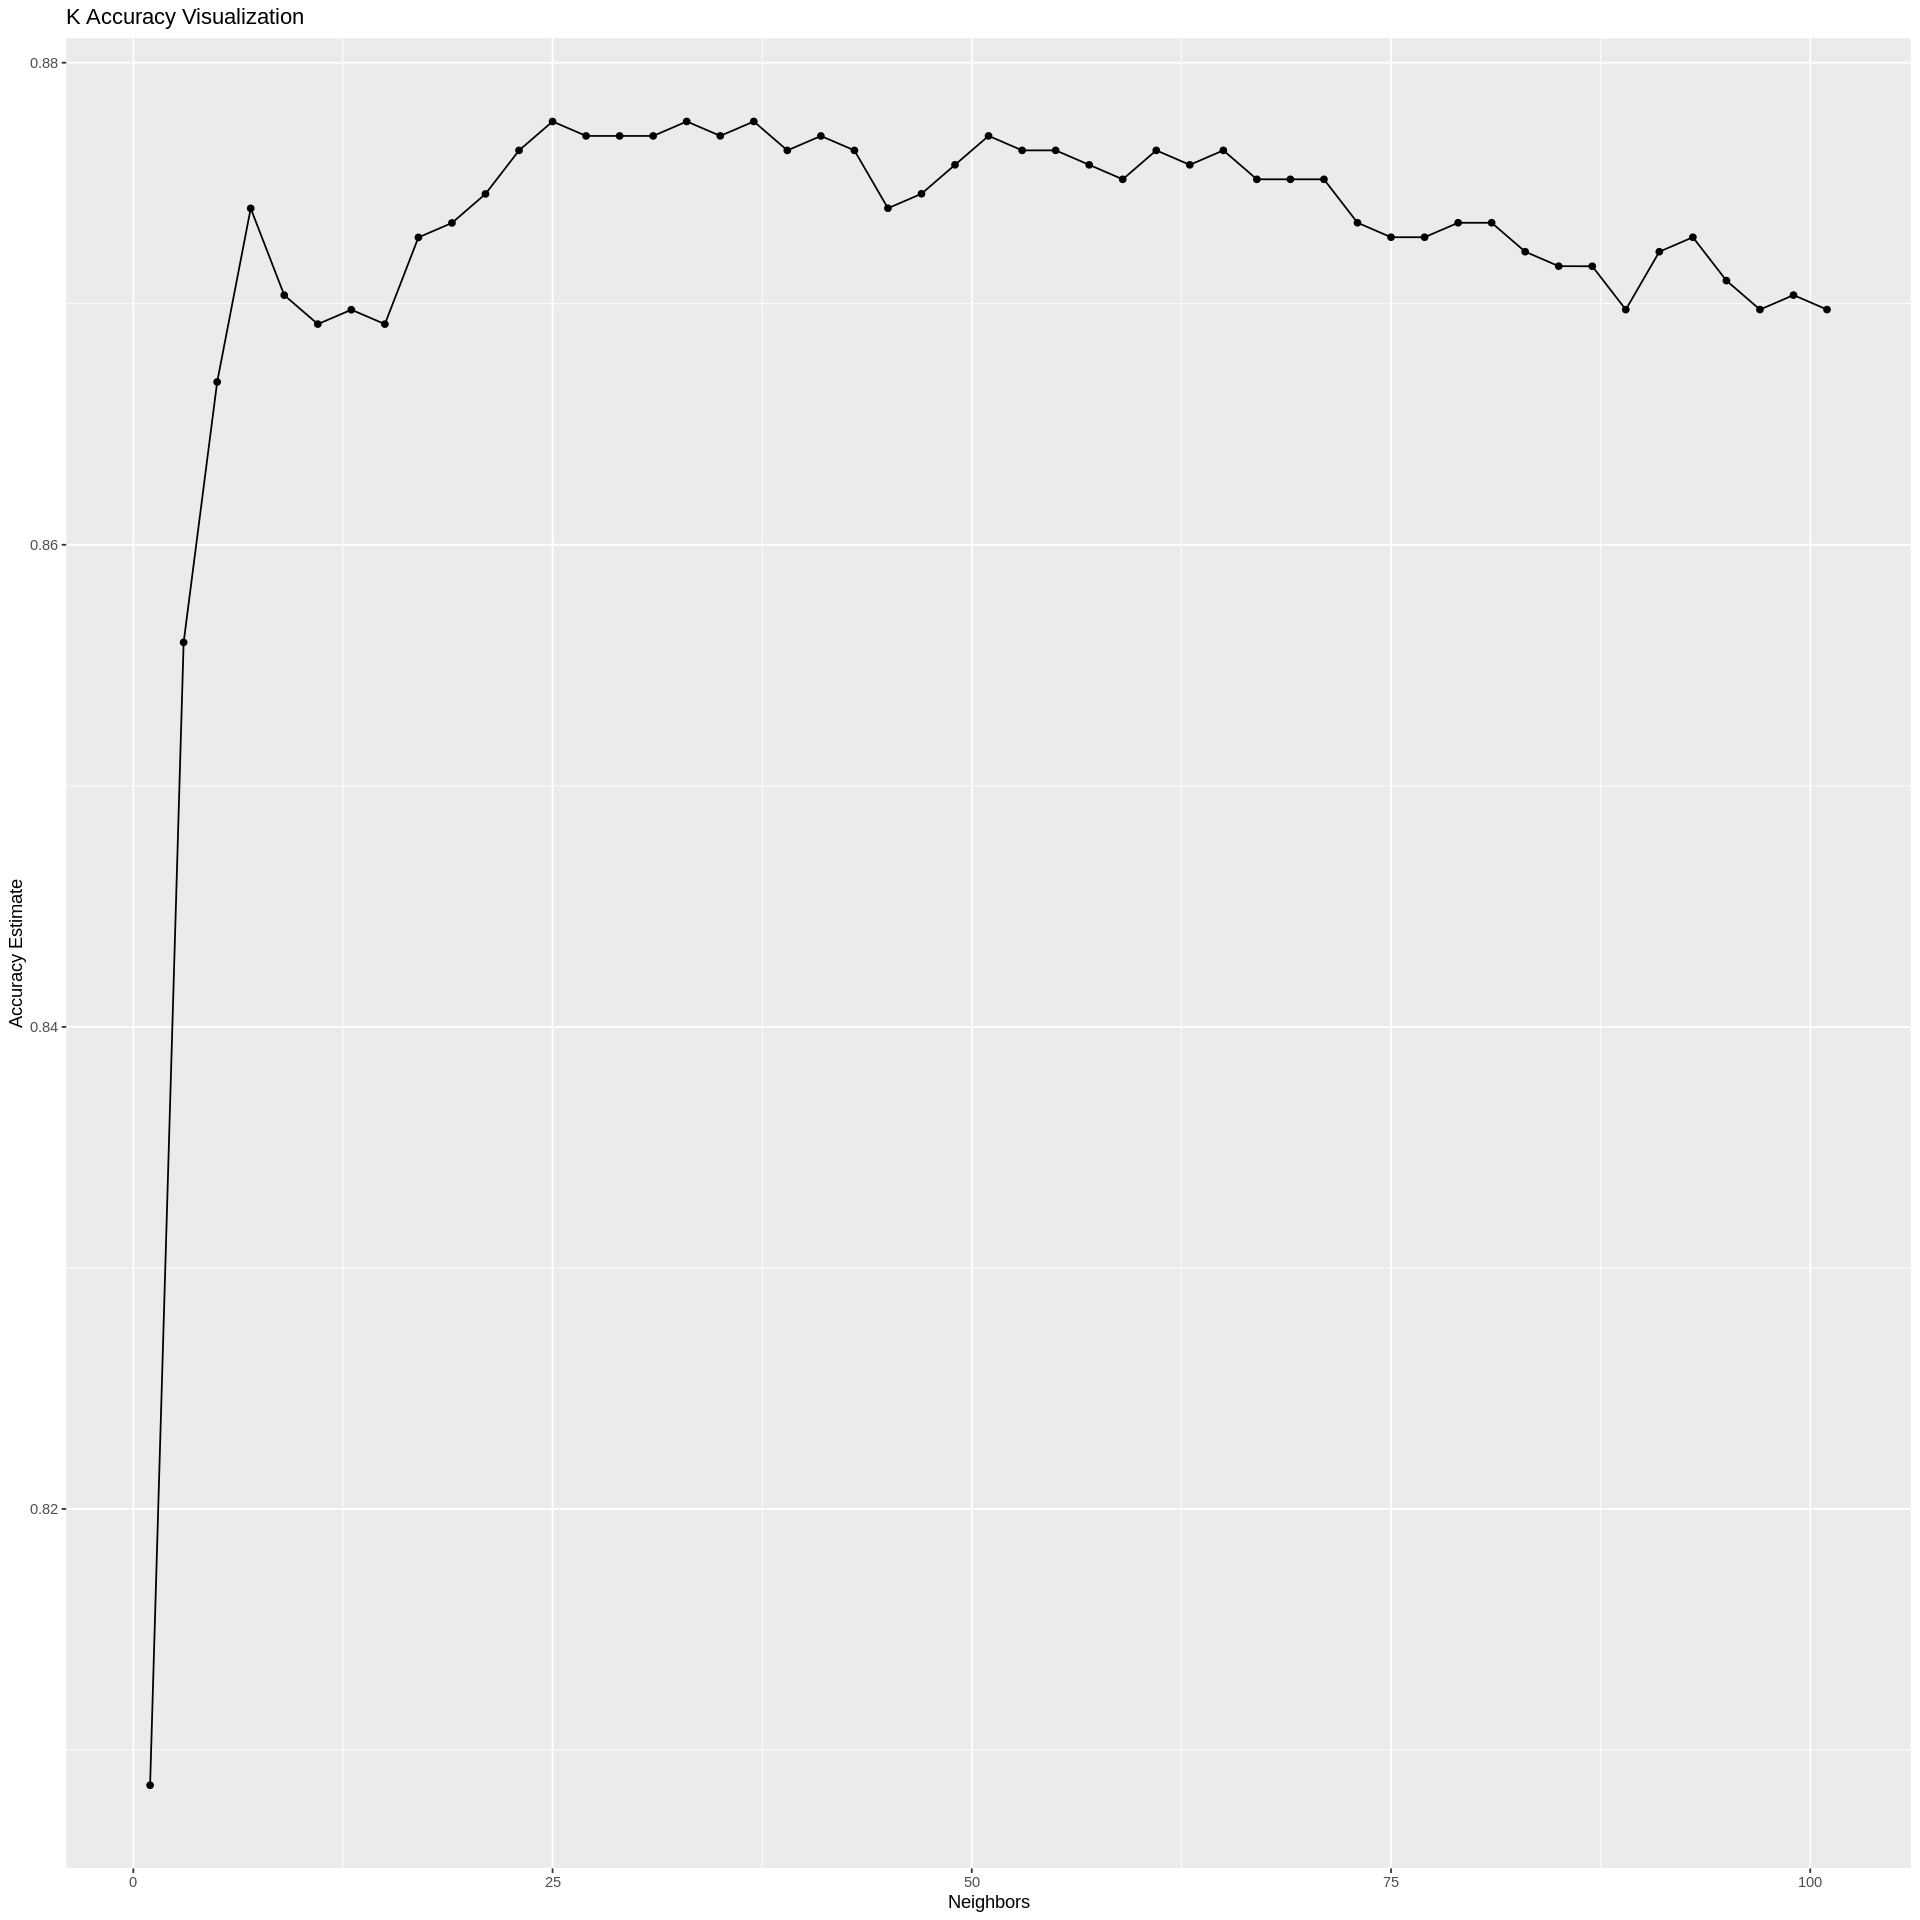

In [21]:
# Accuracy Visualization
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate", title="K Accuracy Visualization")
      #scale_x_continuous(breaks = seq(0, 101, by = 1))  # adjusting the x-axis
      #scale_y_continuous(limits = c(0, 1.0)) # adjusting the y-axis

accuracy_versus_k

In [22]:
# Best K
best_k_row <- accuracies |>
    arrange(mean) |>
    tail(n = 1) 

best_k_row

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
37,accuracy,binary,0.877562,5,0.005499307,Preprocessor1_Model19


In [23]:
# Pull K value
best_k <- best_k_row |>
    pull(neighbors)

best_k

[1] 37

From the result above, we then choose the K value of 69 for this model

#### Modelling with the best K value

In [24]:
# Initialize new spec with the best k value
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
      set_engine("kknn") |>
      set_mode("classification")

In [25]:
# Combine together the recipe and new spec
pumpkin_best_fit <- workflow() |>
      add_recipe(pumpkin_recipe) |>
      add_model(knn_best_spec) |>
      fit(data = train_pumpkin)

pumpkin_best_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(37,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1254502
Best kernel: rectangular
Best k: 37

In [26]:
# Use the model to predict the test data, and bind the prediction column to the test data
pumpkin_test_predictions <- predict(pumpkin_best_fit , test_pumpkin) |>
      bind_cols(test_pumpkin)
pumpkin_test_predictions

.pred_class,Eccentricity,Roundness,Aspect_Ration,Compactness,Class
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Çerçevelik,0.8187,0.8338,1.7413,0.7557,Çerçevelik
Çerçevelik,0.8215,0.8480,1.7535,0.7522,Çerçevelik
Çerçevelik,0.8646,0.7957,1.9903,0.7067,Çerçevelik
⋮,⋮,⋮,⋮,⋮,⋮
Ürgüp Sivrisi,0.8863,0.7626,2.1594,0.6774,Ürgüp Sivrisi
Ürgüp Sivrisi,0.9340,0.6672,2.7996,0.5973,Ürgüp Sivrisi
Ürgüp Sivrisi,0.8990,0.7549,2.2828,0.6599,Ürgüp Sivrisi


In [27]:
# Accuracy data analysis
pumpkin_prediction_accuracy <- pumpkin_test_predictions |>
        metrics(truth = Class, estimate = .pred_class)   

pumpkin_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8717026
kap,binary,0.7420435


In [28]:
# Confusion matrix analysis
pumpkin_mat <- pumpkin_test_predictions |> 
      conf_mat(truth = Class, estimate = .pred_class)

pumpkin_mat

               Truth
Prediction      Çerçevelik Ürgüp Sivrisi
  Çerçevelik           399            72
  Ürgüp Sivrisi         35           328

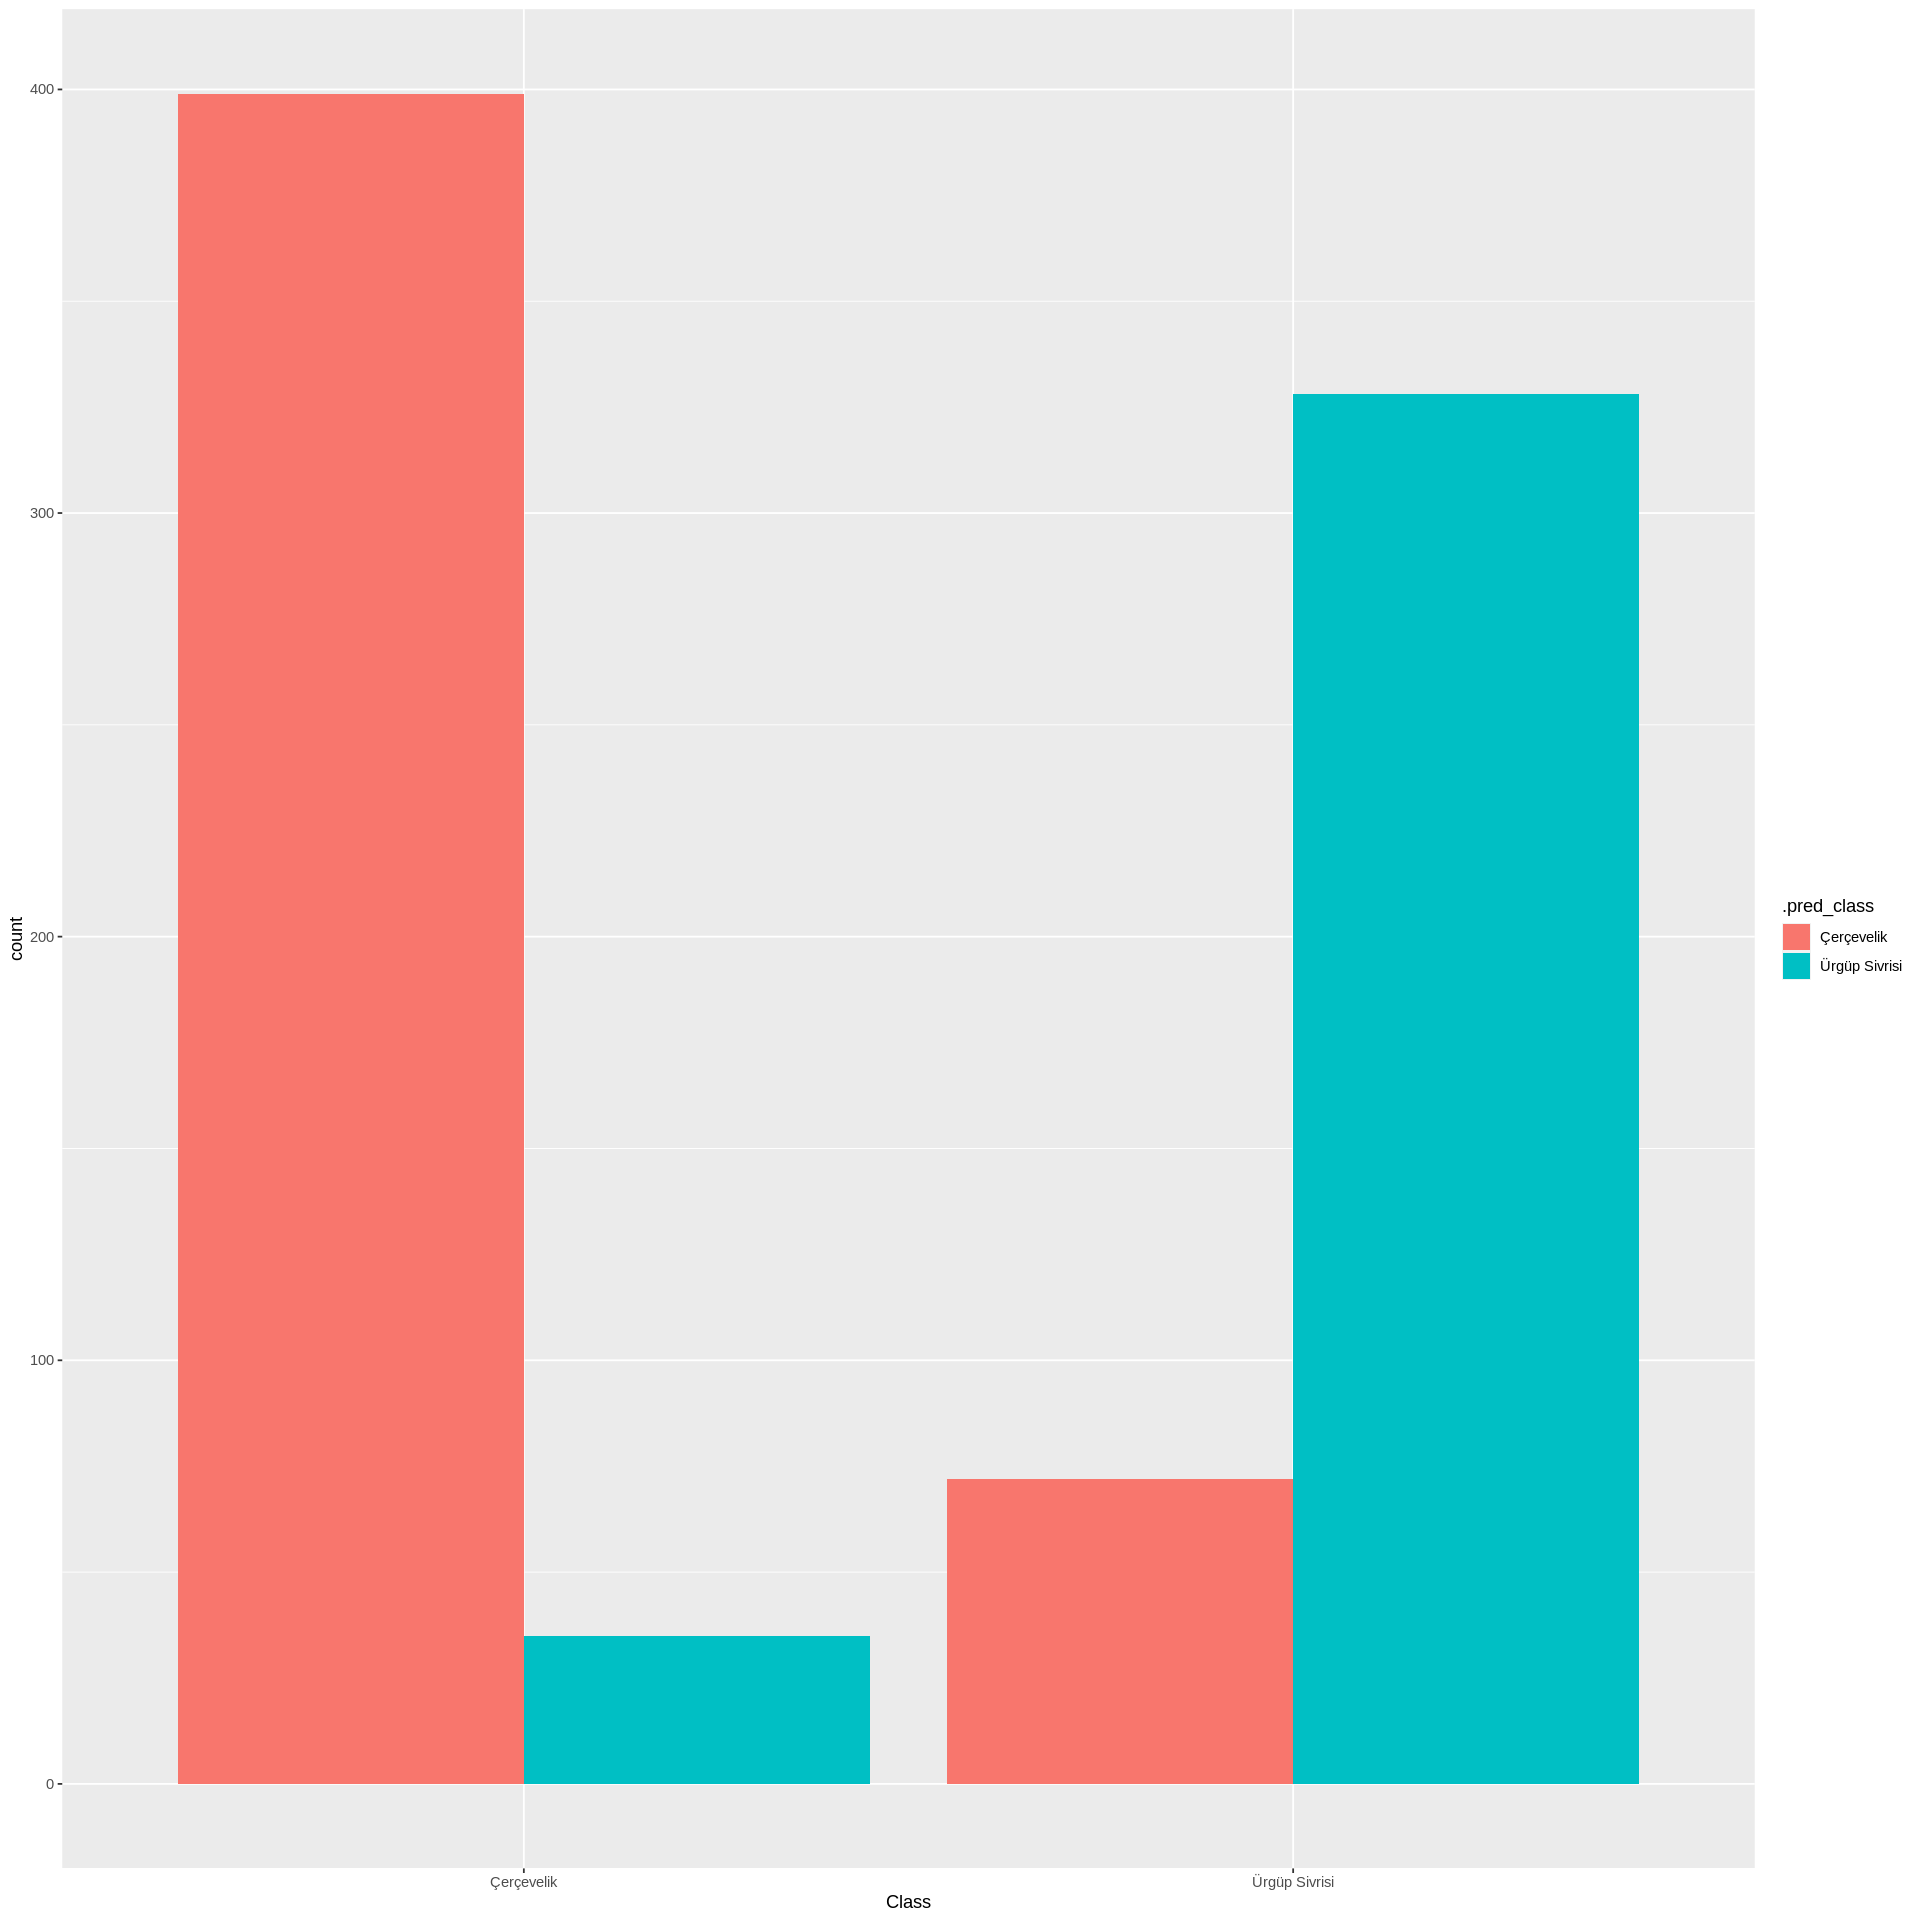

In [29]:
# Visualization of the model accuracy for each class
pumpkin_bar <- ggplot(pumpkin_test_predictions, aes(x = Class, fill = .pred_class)) +
                    geom_bar(position = "dodge") +
                    labs(x = "Class", color = "Prediction From Model")

pumpkin_bar

From the visualization and data accuracy and confusion analysis above, we can conclude that the model have an accuracies of 87.17026 %. Further discussion will be discussed in the next section.

## Discussion

## References
Batista, G. E. A. P. A., & Silva, D. F. (2009, August). How k-nearest neighbor parameters affect its performance. In Argentine symposium on artificial intelligence (pp. 1-12).

KOKLU, M., SARIGIL, S., & OZBEK, O. (2021). The use of machine learning methods in classification of pumpkin seeds (Cucurbita pepo L.). Genetic Resources and Crop Evolution, 68(7), 2713-2726. Doi: https://doi.org/10.1007/s10722-021-01226-0

Joseph, V. R. (2022). Optimal ratio for data splitting. Statistical Analysis and Data Mining, 15(4), 531-538. https://doi.org/10.1002/sam.11583 
